In [1]:
# Supress Warnings
import warnings
warnings.filterwarnings('ignore')

#Importing Libraries
import pandas as pd
import numpy as np
import seaborn as sns

# For Visualisation
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# For Model Building 
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
from sklearn import metrics
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error  #Evaluation Metrics

# To get all columns in tabular form
pd.set_option('display.max_columns',81)
pd.set_option('display.max_rows',100)
pd.set_option('display.width', 100)

In [2]:
df=pd.read_csv('train.csv')
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


### Data Exploration

In [3]:
# The .shape code gives the no. of rows and columns
df.shape

(1460, 81)

In [4]:
# The .info() code gives almost the entire information that needs to be inspected
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [5]:
#To get an idea of the numeric values, use .describe()
df.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1379.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,6.517808,0.613014,1978.506164,1.767123,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,1.625393,0.644666,24.689725,0.747315,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,0.000000,1129.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1961.000000,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,0.000000,1464.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1980.000000,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,0.000000,1776.750000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,572.000000,5642.000000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,14.000000,3.000000,2010.000000,4.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [6]:
#To get an idea of the features and their data types if need to be changed any, use .dtypes()
df.dtypes

Id                 int64
MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
Street            object
Alley             object
LotShape          object
LandContour       object
Utilities         object
LotConfig         object
LandSlope         object
Neighborhood      object
Condition1        object
Condition2        object
BldgType          object
HouseStyle        object
OverallQual        int64
OverallCond        int64
YearBuilt          int64
YearRemodAdd       int64
RoofStyle         object
RoofMatl          object
Exterior1st       object
Exterior2nd       object
MasVnrType        object
MasVnrArea       float64
ExterQual         object
ExterCond         object
Foundation        object
BsmtQual          object
BsmtCond          object
BsmtExposure      object
BsmtFinType1      object
BsmtFinSF1         int64
BsmtFinType2      object
BsmtFinSF2         int64
BsmtUnfSF          int64
TotalBsmtSF        int64
Heating           object


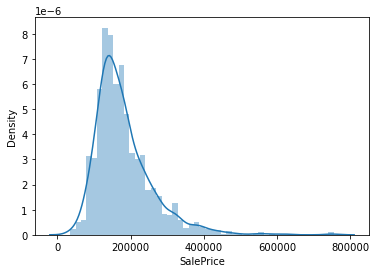

In [7]:
# lets introspect the distribution of the Target col
sns.distplot(df['SalePrice']);

In [8]:
# Skewness
df['SalePrice'].skew()

1.8828757597682129

In [9]:
# kurtosis
df['SalePrice'].kurt()

6.536281860064529

From the above value it shows that it have high kurtosis.i.e, it doesn't lie between -3 and +3

In [10]:
# Creating a columnn 'transformedsaleprice' for the target variable
df['TransformedSalePrice'] = np.log(df['SalePrice'])

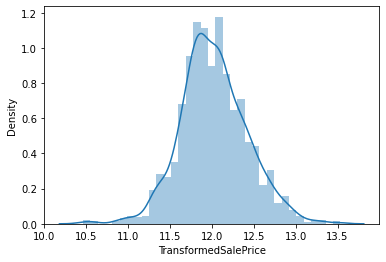

In [11]:
# lets introspect the distribution of the Target col
sns.distplot(df['TransformedSalePrice']);

In [12]:
# Duplicates check
df.loc[df.duplicated()]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,...,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,TransformedSalePrice


In [13]:
# Checking the percentage of missing values
round(100*(df.isnull().sum()/len(df.index)), 2).sort_values(ascending=False)

PoolQC                  99.52
MiscFeature             96.30
Alley                   93.77
Fence                   80.75
FireplaceQu             47.26
LotFrontage             17.74
GarageQual               5.55
GarageCond               5.55
GarageFinish             5.55
GarageType               5.55
GarageYrBlt              5.55
BsmtExposure             2.60
BsmtFinType2             2.60
BsmtQual                 2.53
BsmtCond                 2.53
BsmtFinType1             2.53
MasVnrArea               0.55
MasVnrType               0.55
Electrical               0.07
RoofStyle                0.00
RoofMatl                 0.00
ExterQual                0.00
Exterior1st              0.00
Exterior2nd              0.00
YearBuilt                0.00
ExterCond                0.00
Foundation               0.00
YearRemodAdd             0.00
TransformedSalePrice     0.00
OverallCond              0.00
Utilities                0.00
MSSubClass               0.00
MSZoning                 0.00
LotArea   

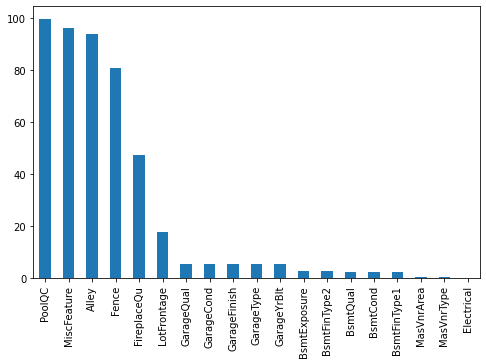

In [14]:
# Checking the percentage of missing values
plt.figure(figsize=[8,5])
round(100*(df.isnull().sum()/len(df.index)), 2).sort_values(ascending=False).head(19).plot(kind='bar');

In [15]:
# From the Data Dictionary we can say some columns having Meaning full NA's so we cant condider them as missing values
# before going for null value analysis filling NA with None

cat_null_NA = ['Alley', 'MasVnrType', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'FireplaceQu', 
            'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PoolQC', 'Fence', 'MiscFeature','Electrical']
for column in cat_null_NA:
    df[column]= df[column].fillna('None')

In [16]:
# Checking the percentage of missing values
round(100*(df.isnull().sum()/len(df.index)), 2).sort_values(ascending=False).head()

LotFrontage    17.74
GarageYrBlt     5.55
MasVnrArea      0.55
Foundation      0.00
RoofStyle       0.00
dtype: float64

In [17]:
# Dropping Columns with more than 15 % missing values
df.drop('LotFrontage',axis=1,inplace=True)

In [18]:
#impute missing values of 
df.GarageYrBlt.fillna(0,inplace=True)

In [19]:
##For 'MasVnrArea', finding the median by removing all the values at 0.0 percentile to get a more precise value.
updated_MasVnrArea = df.MasVnrArea[~(df.MasVnrArea==0)]
print("\nMasVnrArea Stats:\n",updated_MasVnrArea.describe(percentiles=[0.1, .25, .50, .75, .85, .90, .95, .98, .99, 1]))


MasVnrArea Stats:
 count     591.000000
mean      254.739425
std       205.144174
min         1.000000
10%        70.000000
25%       113.000000
50%       203.000000
75%       330.500000
85%       424.500000
90%       481.000000
95%       650.500000
98%       862.000000
99%      1032.600000
100%     1600.000000
max      1600.000000
Name: MasVnrArea, dtype: float64


For 'MasVnrArea', a lot of values are 0.0. So considering the stats excluding 0.0. Impute the nulls with median(203) as there as some outliers.

In [20]:
#impute missing values of MasVnrArea with median 
df['MasVnrArea'] = df['MasVnrArea'].replace(np.nan, updated_MasVnrArea.median())   

**Dealing with data imbalance (categorical variables: object):** Removing (object) categorical features that have more than `80%` data associated to one single value.

In [21]:
##Removing categorical features that have more than 80% data associated to one single value.

def get_cols_imbal(data, prcnt):
    df1= data.copy()
    my_list= []
    cat_obj_cols = df1.select_dtypes(include=['object'])
    for col in (cat_obj_cols):
        if(df1[col].value_counts().max() > int(prcnt*len(df1.index)/100)):
            my_list.append(col)
    return my_list

##Removing the skewed data
columns_to_be_removed = get_cols_imbal(data=df, prcnt=80)  
print("Categorical object type columns removed:",columns_to_be_removed)
print("\nNumber of categorical object type columns removed: ", len(columns_to_be_removed),"\n")

##Dropping columns with skewed data (object type categorical variables)
df = df.drop(columns_to_be_removed, axis=1)
df.head()

Categorical object type columns removed: ['Street', 'Alley', 'LandContour', 'Utilities', 'LandSlope', 'Condition1', 'Condition2', 'BldgType', 'RoofMatl', 'ExterCond', 'BsmtCond', 'BsmtFinType2', 'Heating', 'CentralAir', 'Electrical', 'Functional', 'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature', 'SaleType', 'SaleCondition']

Number of categorical object type columns removed:  24 



,Id,MSSubClass,MSZoning,LotArea,LotShape,LotConfig,Neighborhood,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,Foundation,BsmtQual,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,HeatingQC,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice,TransformedSalePrice
0,1,60,RL,8450,Reg,Inside,CollgCr,2Story,7,5,2003,2003,Gable,VinylSd,VinylSd,BrkFace,196.0,Gd,PConc,Gd,No,GLQ,706,0,150,856,Ex,856,854,0,1710,1,0,2,1,3,1,Gd,8,0,None,Attchd,2003.0,RFn,2,548,0,61,0,0,0,0,0,2,2008,208500,12.247694
1,2,20,RL,9600,Reg,FR2,Veenker,1Story,6,8,1976,1976,Gable,MetalSd,MetalSd,None,0.0,TA,CBlock,Gd,Gd,ALQ,978,0,284,1262,Ex,1262,0,0,1262,0,1,2,0,3,1,TA,6,1,TA,Attchd,1976.0,RFn,2,460,298,0,0,0,0,0,0,5,2007,181500,12.109011
2,3,60,RL,11250,IR1,Inside,CollgCr,2Story,7,5,2001,2002,Gable,VinylSd,VinylSd,BrkFace,162.0,Gd,PConc,Gd,Mn,GLQ,486,0,434,920,Ex,920,866,0,1786,1,0,2,1,3,1,Gd,6,1,TA,Attchd,2001.0,RFn,2,608,0,42,0,0,0,0,0,9,2008,223500,12.317167
3,4,70,RL,9550,IR1,Corner,Crawfor,2Story,7,5,1915,1970,Gable,Wd Sdng,Wd Shng,None,0.0,TA,BrkTil,TA,No,ALQ,216,0,540,756,Gd,961,756,0,1717,1,0,1,0,3,1,Gd,7,1,Gd,Detchd,1998.0,Unf,3,642,0,35,272,0,0,0,0,2,2006,140000,11.849398
4,5,60,RL,14260,IR1,FR2,NoRidge,2Story,8,5,2000,2000,Gable,VinylSd,VinylSd,BrkFace,350.0,Gd,PConc,Gd,Av,GLQ,655,0,490,1145,Ex,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,1,TA,Attchd,2000.0,RFn,3,836,192,84,0,0,0,0,0,12,2008,250000,12.429216


In [22]:
df.shape

(1460, 57)

In [23]:
df.isna().sum()

Id                      0
MSSubClass              0
MSZoning                0
LotArea                 0
LotShape                0
LotConfig               0
Neighborhood            0
HouseStyle              0
OverallQual             0
OverallCond             0
YearBuilt               0
YearRemodAdd            0
RoofStyle               0
Exterior1st             0
Exterior2nd             0
MasVnrType              0
MasVnrArea              0
ExterQual               0
Foundation              0
BsmtQual                0
BsmtExposure            0
BsmtFinType1            0
BsmtFinSF1              0
BsmtFinSF2              0
BsmtUnfSF               0
TotalBsmtSF             0
HeatingQC               0
1stFlrSF                0
2ndFlrSF                0
LowQualFinSF            0
GrLivArea               0
BsmtFullBath            0
BsmtHalfBath            0
FullBath                0
HalfBath                0
BedroomAbvGr            0
KitchenAbvGr            0
KitchenQual             0
TotRmsAbvGrd

### Derived features:

In [24]:
#Create a new column named 'WhetherRemodelled': This column would determine whether the house has been remodelled or not based on 'YearBuilt' anf 'YearRemodAdd' 

def Remodel_Check(row):     #Based on the difference between remodelled and built years
    if(row['YearBuilt'] == row['YearRemodAdd']):
        return 0     #Indicate not Remodelled
    elif (row['YearBuilt'] < row['YearRemodAdd']):
        return 1     #Indicated Remodelled
    else:
        return 2    #Any other observation check
    
df['WhetherRemodelled'] = df.apply(Remodel_Check, axis=1)
df.head()   

,Id,MSSubClass,MSZoning,LotArea,LotShape,LotConfig,Neighborhood,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,Foundation,BsmtQual,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,HeatingQC,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice,TransformedSalePrice,WhetherRemodelled
0,1,60,RL,8450,Reg,Inside,CollgCr,2Story,7,5,2003,2003,Gable,VinylSd,VinylSd,BrkFace,196.0,Gd,PConc,Gd,No,GLQ,706,0,150,856,Ex,856,854,0,1710,1,0,2,1,3,1,Gd,8,0,None,Attchd,2003.0,RFn,2,548,0,61,0,0,0,0,0,2,2008,208500,12.247694,0
1,2,20,RL,9600,Reg,FR2,Veenker,1Story,6,8,1976,1976,Gable,MetalSd,MetalSd,None,0.0,TA,CBlock,Gd,Gd,ALQ,978,0,284,1262,Ex,1262,0,0,1262,0,1,2,0,3,1,TA,6,1,TA,Attchd,1976.0,RFn,2,460,298,0,0,0,0,0,0,5,2007,181500,12.109011,0
2,3,60,RL,11250,IR1,Inside,CollgCr,2Story,7,5,2001,2002,Gable,VinylSd,VinylSd,BrkFace,162.0,Gd,PConc,Gd,Mn,GLQ,486,0,434,920,Ex,920,866,0,1786,1,0,2,1,3,1,Gd,6,1,TA,Attchd,2001.0,RFn,2,608,0,42,0,0,0,0,0,9,2008,223500,12.317167,1
3,4,70,RL,9550,IR1,Corner,Crawfor,2Story,7,5,1915,1970,Gable,Wd Sdng,Wd Shng,None,0.0,TA,BrkTil,TA,No,ALQ,216,0,540,756,Gd,961,756,0,1717,1,0,1,0,3,1,Gd,7,1,Gd,Detchd,1998.0,Unf,3,642,0,35,272,0,0,0,0,2,2006,140000,11.849398,1
4,5,60,RL,14260,IR1,FR2,NoRidge,2Story,8,5,2000,2000,Gable,VinylSd,VinylSd,BrkFace,350.0,Gd,PConc,Gd,Av,GLQ,655,0,490,1145,Ex,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,1,TA,Attchd,2000.0,RFn,3,836,192,84,0,0,0,0,0,12,2008,250000,12.429216,0


In [25]:
##Confirmed: no wrong entries with value '2'. Hence, 0 if not remodelled and 1 if remodelled.
df.WhetherRemodelled.value_counts()

0    764
1    696
Name: WhetherRemodelled, dtype: int64

In [26]:
##Derive a new variable named 'AgeofProperty' to determine the age of property since the built

def find_age_since_built(row):
        return row['YrSold'] - row['YearBuilt']
    
df['AgeofProperty'] = df.apply(find_age_since_built, axis=1)
df.head()  

,Id,MSSubClass,MSZoning,LotArea,LotShape,LotConfig,Neighborhood,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,Foundation,BsmtQual,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,HeatingQC,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice,TransformedSalePrice,WhetherRemodelled,AgeofProperty
0,1,60,RL,8450,Reg,Inside,CollgCr,2Story,7,5,2003,2003,Gable,VinylSd,VinylSd,BrkFace,196.0,Gd,PConc,Gd,No,GLQ,706,0,150,856,Ex,856,854,0,1710,1,0,2,1,3,1,Gd,8,0,None,Attchd,2003.0,RFn,2,548,0,61,0,0,0,0,0,2,2008,208500,12.247694,0,5
1,2,20,RL,9600,Reg,FR2,Veenker,1Story,6,8,1976,1976,Gable,MetalSd,MetalSd,None,0.0,TA,CBlock,Gd,Gd,ALQ,978,0,284,1262,Ex,1262,0,0,1262,0,1,2,0,3,1,TA,6,1,TA,Attchd,1976.0,RFn,2,460,298,0,0,0,0,0,0,5,2007,181500,12.109011,0,31
2,3,60,RL,11250,IR1,Inside,CollgCr,2Story,7,5,2001,2002,Gable,VinylSd,VinylSd,BrkFace,162.0,Gd,PConc,Gd,Mn,GLQ,486,0,434,920,Ex,920,866,0,1786,1,0,2,1,3,1,Gd,6,1,TA,Attchd,2001.0,RFn,2,608,0,42,0,0,0,0,0,9,2008,223500,12.317167,1,7
3,4,70,RL,9550,IR1,Corner,Crawfor,2Story,7,5,1915,1970,Gable,Wd Sdng,Wd Shng,None,0.0,TA,BrkTil,TA,No,ALQ,216,0,540,756,Gd,961,756,0,1717,1,0,1,0,3,1,Gd,7,1,Gd,Detchd,1998.0,Unf,3,642,0,35,272,0,0,0,0,2,2006,140000,11.849398,1,91
4,5,60,RL,14260,IR1,FR2,NoRidge,2Story,8,5,2000,2000,Gable,VinylSd,VinylSd,BrkFace,350.0,Gd,PConc,Gd,Av,GLQ,655,0,490,1145,Ex,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,1,TA,Attchd,2000.0,RFn,3,836,192,84,0,0,0,0,0,12,2008,250000,12.429216,0,8


In [27]:
##Dropping the raw attributes from which the new features were derived. These aren't necessary for analysis
##Dropping 'YrSold', 'GarageYrBlt', 'YearRemodAdd' and 'YearBuilt'

df = df.drop(['YearBuilt', 'YearRemodAdd', 'YrSold', 'GarageYrBlt'], axis = 1)
df.head()

,Id,MSSubClass,MSZoning,LotArea,LotShape,LotConfig,Neighborhood,HouseStyle,OverallQual,OverallCond,RoofStyle,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,Foundation,BsmtQual,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,HeatingQC,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Fireplaces,FireplaceQu,GarageType,GarageFinish,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,SalePrice,TransformedSalePrice,WhetherRemodelled,AgeofProperty
0,1,60,RL,8450,Reg,Inside,CollgCr,2Story,7,5,Gable,VinylSd,VinylSd,BrkFace,196.0,Gd,PConc,Gd,No,GLQ,706,0,150,856,Ex,856,854,0,1710,1,0,2,1,3,1,Gd,8,0,None,Attchd,RFn,2,548,0,61,0,0,0,0,0,2,208500,12.247694,0,5
1,2,20,RL,9600,Reg,FR2,Veenker,1Story,6,8,Gable,MetalSd,MetalSd,None,0.0,TA,CBlock,Gd,Gd,ALQ,978,0,284,1262,Ex,1262,0,0,1262,0,1,2,0,3,1,TA,6,1,TA,Attchd,RFn,2,460,298,0,0,0,0,0,0,5,181500,12.109011,0,31
2,3,60,RL,11250,IR1,Inside,CollgCr,2Story,7,5,Gable,VinylSd,VinylSd,BrkFace,162.0,Gd,PConc,Gd,Mn,GLQ,486,0,434,920,Ex,920,866,0,1786,1,0,2,1,3,1,Gd,6,1,TA,Attchd,RFn,2,608,0,42,0,0,0,0,0,9,223500,12.317167,1,7
3,4,70,RL,9550,IR1,Corner,Crawfor,2Story,7,5,Gable,Wd Sdng,Wd Shng,None,0.0,TA,BrkTil,TA,No,ALQ,216,0,540,756,Gd,961,756,0,1717,1,0,1,0,3,1,Gd,7,1,Gd,Detchd,Unf,3,642,0,35,272,0,0,0,0,2,140000,11.849398,1,91
4,5,60,RL,14260,IR1,FR2,NoRidge,2Story,8,5,Gable,VinylSd,VinylSd,BrkFace,350.0,Gd,PConc,Gd,Av,GLQ,655,0,490,1145,Ex,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,1,TA,Attchd,RFn,3,836,192,84,0,0,0,0,0,12,250000,12.429216,0,8


**Dealing with data imbalance (numeric variables):** Removing numeric attributes that have more than `80%` data associated to one single value.

In [28]:
##Removing numeric attributes that have more than 80% data associated to one single value.

def get_num_cols_imbal(data, prcnt):
    df1= data.copy()
    my_list= []
    num_cols = df1.select_dtypes(include=['int64','float64','int32','float32'])
    for col in (num_cols):
        if(df1[col].value_counts().max() > int(prcnt*len(df1.index)/100)):
            my_list.append(col)
    return my_list

##Removing the skewed data
num_cols_to_be_removed = get_num_cols_imbal(data=df, prcnt=80)  
print("Numeric columns removed:",num_cols_to_be_removed)
print("\nNumber of numeric columns removed: ", len(num_cols_to_be_removed),"\n")


##Dropping columns with skewed data (int and float type numeric variables)
df = df.drop(num_cols_to_be_removed, axis=1)
df.head()

Numeric columns removed: ['BsmtFinSF2', 'LowQualFinSF', 'BsmtHalfBath', 'KitchenAbvGr', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal']

Number of numeric columns removed:  9 



,Id,MSSubClass,MSZoning,LotArea,LotShape,LotConfig,Neighborhood,HouseStyle,OverallQual,OverallCond,RoofStyle,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,Foundation,BsmtQual,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtUnfSF,TotalBsmtSF,HeatingQC,1stFlrSF,2ndFlrSF,GrLivArea,BsmtFullBath,FullBath,HalfBath,BedroomAbvGr,KitchenQual,TotRmsAbvGrd,Fireplaces,FireplaceQu,GarageType,GarageFinish,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,MoSold,SalePrice,TransformedSalePrice,WhetherRemodelled,AgeofProperty
0,1,60,RL,8450,Reg,Inside,CollgCr,2Story,7,5,Gable,VinylSd,VinylSd,BrkFace,196.0,Gd,PConc,Gd,No,GLQ,706,150,856,Ex,856,854,1710,1,2,1,3,Gd,8,0,None,Attchd,RFn,2,548,0,61,2,208500,12.247694,0,5
1,2,20,RL,9600,Reg,FR2,Veenker,1Story,6,8,Gable,MetalSd,MetalSd,None,0.0,TA,CBlock,Gd,Gd,ALQ,978,284,1262,Ex,1262,0,1262,0,2,0,3,TA,6,1,TA,Attchd,RFn,2,460,298,0,5,181500,12.109011,0,31
2,3,60,RL,11250,IR1,Inside,CollgCr,2Story,7,5,Gable,VinylSd,VinylSd,BrkFace,162.0,Gd,PConc,Gd,Mn,GLQ,486,434,920,Ex,920,866,1786,1,2,1,3,Gd,6,1,TA,Attchd,RFn,2,608,0,42,9,223500,12.317167,1,7
3,4,70,RL,9550,IR1,Corner,Crawfor,2Story,7,5,Gable,Wd Sdng,Wd Shng,None,0.0,TA,BrkTil,TA,No,ALQ,216,540,756,Gd,961,756,1717,1,1,0,3,Gd,7,1,Gd,Detchd,Unf,3,642,0,35,2,140000,11.849398,1,91
4,5,60,RL,14260,IR1,FR2,NoRidge,2Story,8,5,Gable,VinylSd,VinylSd,BrkFace,350.0,Gd,PConc,Gd,Av,GLQ,655,490,1145,Ex,1145,1053,2198,1,2,1,4,Gd,9,1,TA,Attchd,RFn,3,836,192,84,12,250000,12.429216,0,8


In [29]:
df.shape

(1460, 46)

In [30]:
#Removing 'Id' and 'MoSold' columns as they are trivial for our analysis
df = df.drop(['Id','MoSold'], axis=1)

In [31]:
##Numeric categorical variables
numeric_cat_cols = ['MSSubClass','MoSold','OverallQual','OverallCond','BsmtFullBath','FullBath','HalfBath','BedroomAbvGr',\
                    'TotRmsAbvGrd','Fireplaces','GarageCars','WhetherRemodelled']

**Outlier Treatment**

In [32]:
#Check outliers
df.describe(percentiles=[0.1,0.25,0.5,0.75,0.95,0.98,0.99,1])

,MSSubClass,LotArea,OverallQual,OverallCond,MasVnrArea,BsmtFinSF1,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,GrLivArea,BsmtFullBath,FullBath,HalfBath,BedroomAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,SalePrice,TransformedSalePrice,WhetherRemodelled,AgeofProperty
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,56.897260,10516.828082,6.099315,5.575342,104.229452,443.639726,567.240411,1057.429452,1162.626712,346.992466,1515.463699,0.425342,1.565068,0.382877,2.866438,6.517808,0.613014,1.767123,472.980137,94.244521,46.660274,180921.195890,12.024051,0.476712,36.547945
std,42.300571,9981.264932,1.382997,1.112799,180.717988,456.098091,441.866955,438.705324,386.587738,436.528436,525.480383,0.518911,0.550916,0.502885,0.815778,1.625393,0.644666,0.747315,213.804841,125.338794,66.256028,79442.502883,0.399452,0.499629,30.250152
min,20.000000,1300.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,34900.000000,10.460242,0.000000,0.000000
10%,20.000000,5000.000000,5.000000,5.000000,0.000000,0.000000,74.900000,636.900000,756.900000,0.000000,912.000000,0.000000,1.000000,0.000000,2.000000,5.000000,0.000000,1.000000,240.000000,0.000000,0.000000,106475.000000,11.575665,0.000000,1.000000
25%,20.000000,7553.500000,5.000000,5.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,1129.500000,0.000000,1.000000,0.000000,2.000000,5.000000,0.000000,1.000000,334.500000,0.000000,0.000000,129975.000000,11.775097,0.000000,8.000000
50%,50.000000,9478.500000,6.000000,5.000000,0.000000,383.500000,477.500000,991.500000,1087.000000,0.000000,1464.000000,0.000000,2.000000,0.000000,3.000000,6.000000,1.000000,2.000000,480.000000,0.000000,25.000000,163000.000000,12.001505,0.000000,35.000000
75%,70.000000,11601.500000,7.000000,6.000000,168.000000,712.250000,808.000000,1298.250000,1391.250000,728.000000,1776.750000,1.000000,2.000000,1.000000,3.000000,7.000000,1.000000,2.000000,576.000000,168.000000,68.000000,214000.000000,12.273731,1.000000,54.000000
95%,160.000000,17401.150000,8.000000,8.000000,456.000000,1274.000000,1468.000000,1753.000000,1831.250000,1141.050000,2466.100000,1.000000,2.000000,1.000000,4.000000,10.000000,2.000000,3.000000,850.100000,335.000000,175.050000,326100.000000,12.694958,1.000000,91.000000
98%,188.200000,25251.620000,9.000000,8.000000,650.820000,1442.640000,1678.200000,2001.640000,2072.280000,1318.560000,2782.380000,1.000000,3.000000,1.000000,4.000000,10.820000,2.000000,3.000000,907.460000,430.100000,240.820000,394931.060000,12.886466,1.000000,100.000000


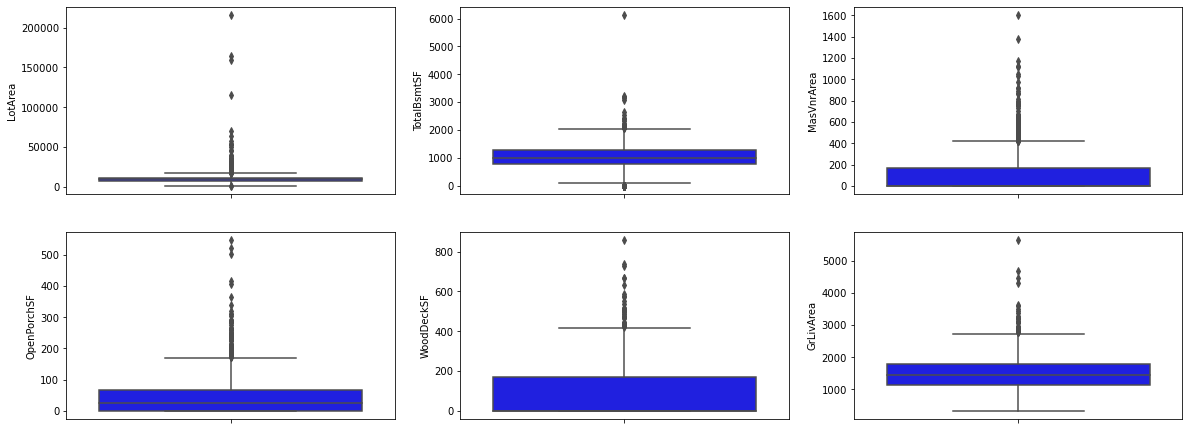

In [33]:
# Check the outliers in all the numeric columns (boxplot)

plt.figure(figsize=(20, 20))
plt.subplot(5,3,1)
sns.boxplot(y = 'LotArea', color='b', data = df)
plt.subplot(5,3,2)
sns.boxplot(y = 'TotalBsmtSF', color='b', data = df)
plt.subplot(5,3,3)
sns.boxplot(y = 'MasVnrArea', color='b', data = df)
plt.subplot(5,3,4)
sns.boxplot(y = 'OpenPorchSF', color='b', data = df)
plt.subplot(5,3,5)
sns.boxplot(y = 'WoodDeckSF', color='b', data = df)
plt.subplot(5,3,6)
sns.boxplot(y = 'GrLivArea', color='b', data = df)
plt.show()

In [34]:
def outlier_treatment(df, col):
    
    Q1 = df[col].quantile(0.25)

    Q3 = df[col].quantile(0.75)

    IQR = Q3 - Q1

    lower_cap  = Q1-1.5*IQR

    higher_cap = Q3+1.5*IQR

    df.loc[(df[col] > higher_cap), col] = higher_cap
    #df.loc[(df[col] < lower_cap), col] = lower_cap
    
    return df

In [35]:
df=outlier_treatment(df,'LotArea')
df=outlier_treatment(df,'TotalBsmtSF')
df=outlier_treatment(df,'WoodDeckSF')
df=outlier_treatment(df,'OpenPorchSF')

In [36]:
# Determine the percentage of data retained

retained_data = round(100*(len(df)/1460),2)
print(retained_data,"%")

100.0 %


<Figure size 1440x1200 with 0 Axes>

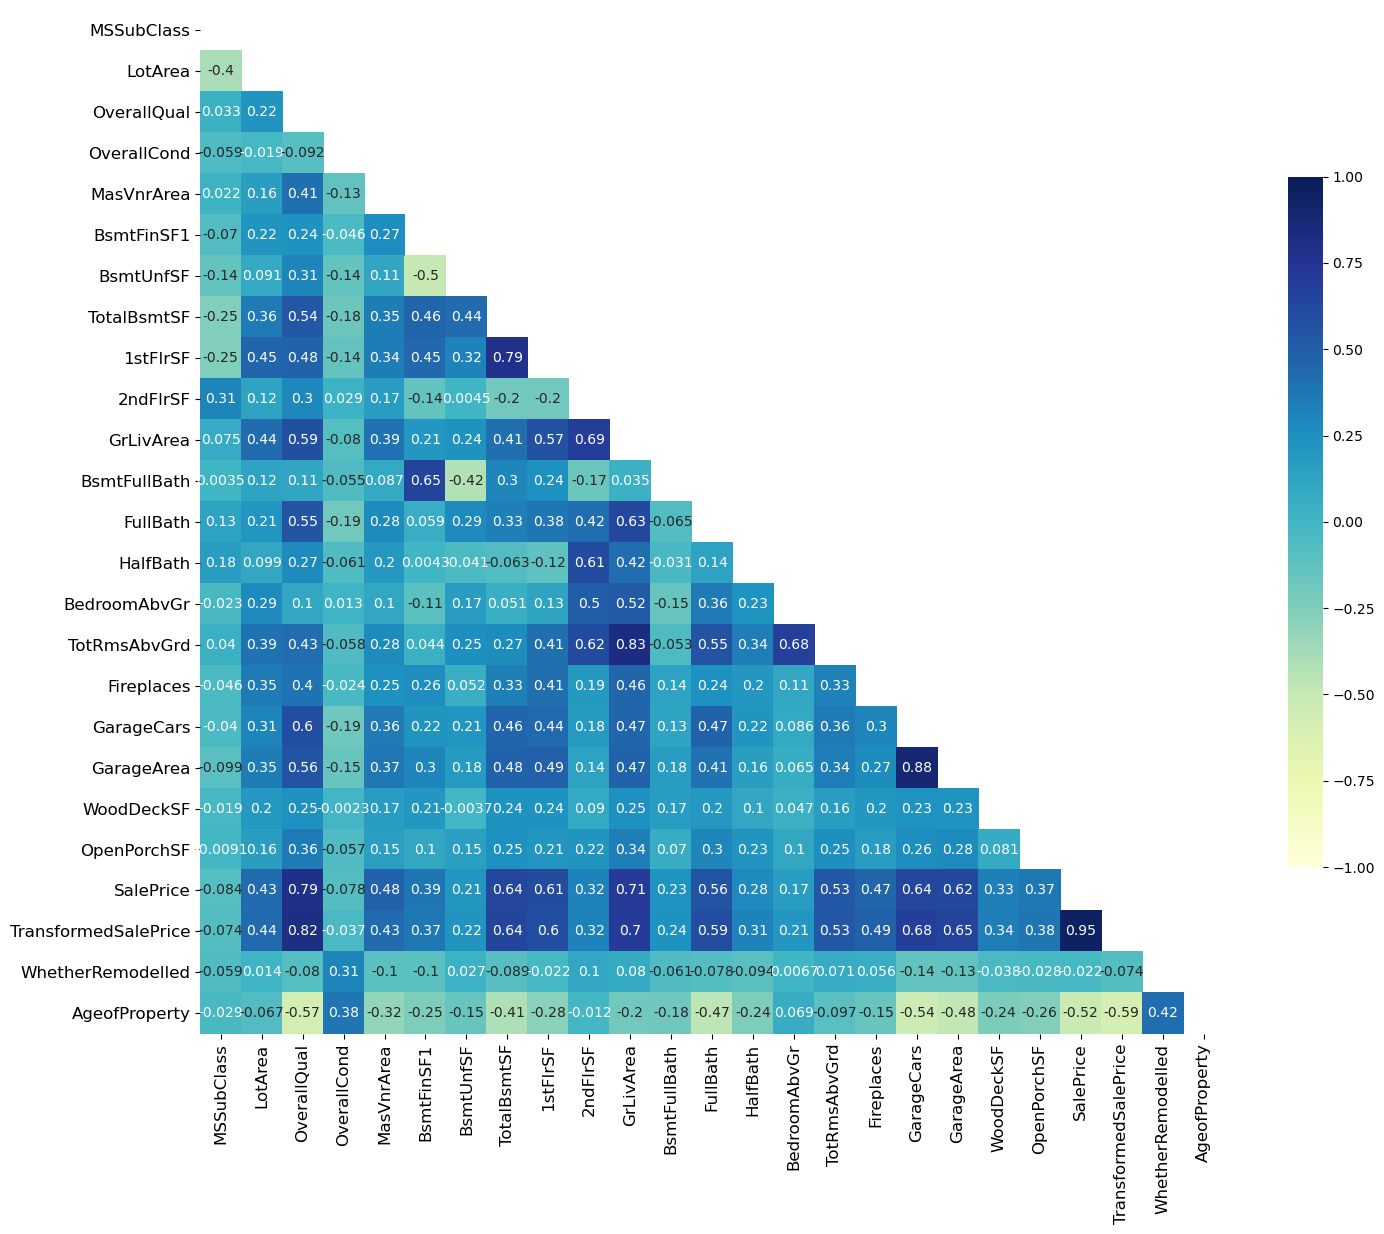

In [37]:
#Plotting a heatmap to understand correlation amongst numeric variables (ignore the categorical numeric ones)
numeric_vars= df.select_dtypes(include=['int32','float32','int64','float64']).columns
plt.figure(figsize = (12,10), dpi=120)
corr_matrix_new = df[numeric_vars].corr()
my_mask_1 = np.triu(np.ones_like(corr_matrix_new, dtype=np.bool))
f, ax_corr1 = plt.subplots(figsize=(15, 15), dpi=100)
ax_corr1 = sns.heatmap(corr_matrix_new, cmap= 'YlGnBu', cbar_kws={"shrink": .5}, vmin= -1, vmax=1, center=0,
            square=True, mask=my_mask_1, annot=True)
plt.xticks(fontsize=12, rotation=90)
plt.yticks(fontsize=12, rotation=0)
plt.tight_layout()
plt.autoscale()
plt.show()

**Observations:**<br>(1)The predictors `'GrLivArea'` and `'TotRmsAbvGrd'` shows (0.83) strong positive correlation. Hence, dropping `'TotRmsAbvGrd'`.<br>(2)The predictors `'GarageCars'` and `'GarageArea'` shows (0.89) strong positive correlation. Hence, dropping `'GarageCars'`.<br>(1)The predictors `'GrLivArea'` and `'2ndFlrSF'` shows (0.71) strong positive correlation. Hence, dropping `'2ndFlrSF'`.<br>(2)The predictors `'1stFlrSF'` and `'TotalBsmtSF'` shows (0.77) strong positive correlation. Hence, dropping `'1stFlrSF'`.<br>

In [38]:
##Removing the highly correlated predictors to reduce multicollinearity.

df= df.drop(['TotRmsAbvGrd', 'GarageCars', '2ndFlrSF', '1stFlrSF'], axis = 1)
df.head()

,MSSubClass,MSZoning,LotArea,LotShape,LotConfig,Neighborhood,HouseStyle,OverallQual,OverallCond,RoofStyle,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,Foundation,BsmtQual,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtUnfSF,TotalBsmtSF,HeatingQC,GrLivArea,BsmtFullBath,FullBath,HalfBath,BedroomAbvGr,KitchenQual,Fireplaces,FireplaceQu,GarageType,GarageFinish,GarageArea,WoodDeckSF,OpenPorchSF,SalePrice,TransformedSalePrice,WhetherRemodelled,AgeofProperty
0,60,RL,8450.0,Reg,Inside,CollgCr,2Story,7,5,Gable,VinylSd,VinylSd,BrkFace,196.0,Gd,PConc,Gd,No,GLQ,706,150,856.0,Ex,1710,1,2,1,3,Gd,0,None,Attchd,RFn,548,0.0,61.0,208500,12.247694,0,5
1,20,RL,9600.0,Reg,FR2,Veenker,1Story,6,8,Gable,MetalSd,MetalSd,None,0.0,TA,CBlock,Gd,Gd,ALQ,978,284,1262.0,Ex,1262,0,2,0,3,TA,1,TA,Attchd,RFn,460,298.0,0.0,181500,12.109011,0,31
2,60,RL,11250.0,IR1,Inside,CollgCr,2Story,7,5,Gable,VinylSd,VinylSd,BrkFace,162.0,Gd,PConc,Gd,Mn,GLQ,486,434,920.0,Ex,1786,1,2,1,3,Gd,1,TA,Attchd,RFn,608,0.0,42.0,223500,12.317167,1,7
3,70,RL,9550.0,IR1,Corner,Crawfor,2Story,7,5,Gable,Wd Sdng,Wd Shng,None,0.0,TA,BrkTil,TA,No,ALQ,216,540,756.0,Gd,1717,1,1,0,3,Gd,1,Gd,Detchd,Unf,642,0.0,35.0,140000,11.849398,1,91
4,60,RL,14260.0,IR1,FR2,NoRidge,2Story,8,5,Gable,VinylSd,VinylSd,BrkFace,350.0,Gd,PConc,Gd,Av,GLQ,655,490,1145.0,Ex,2198,1,2,1,4,Gd,1,TA,Attchd,RFn,836,192.0,84.0,250000,12.429216,0,8


In [39]:
df.shape

(1460, 40)

<Figure size 1440x1200 with 0 Axes>

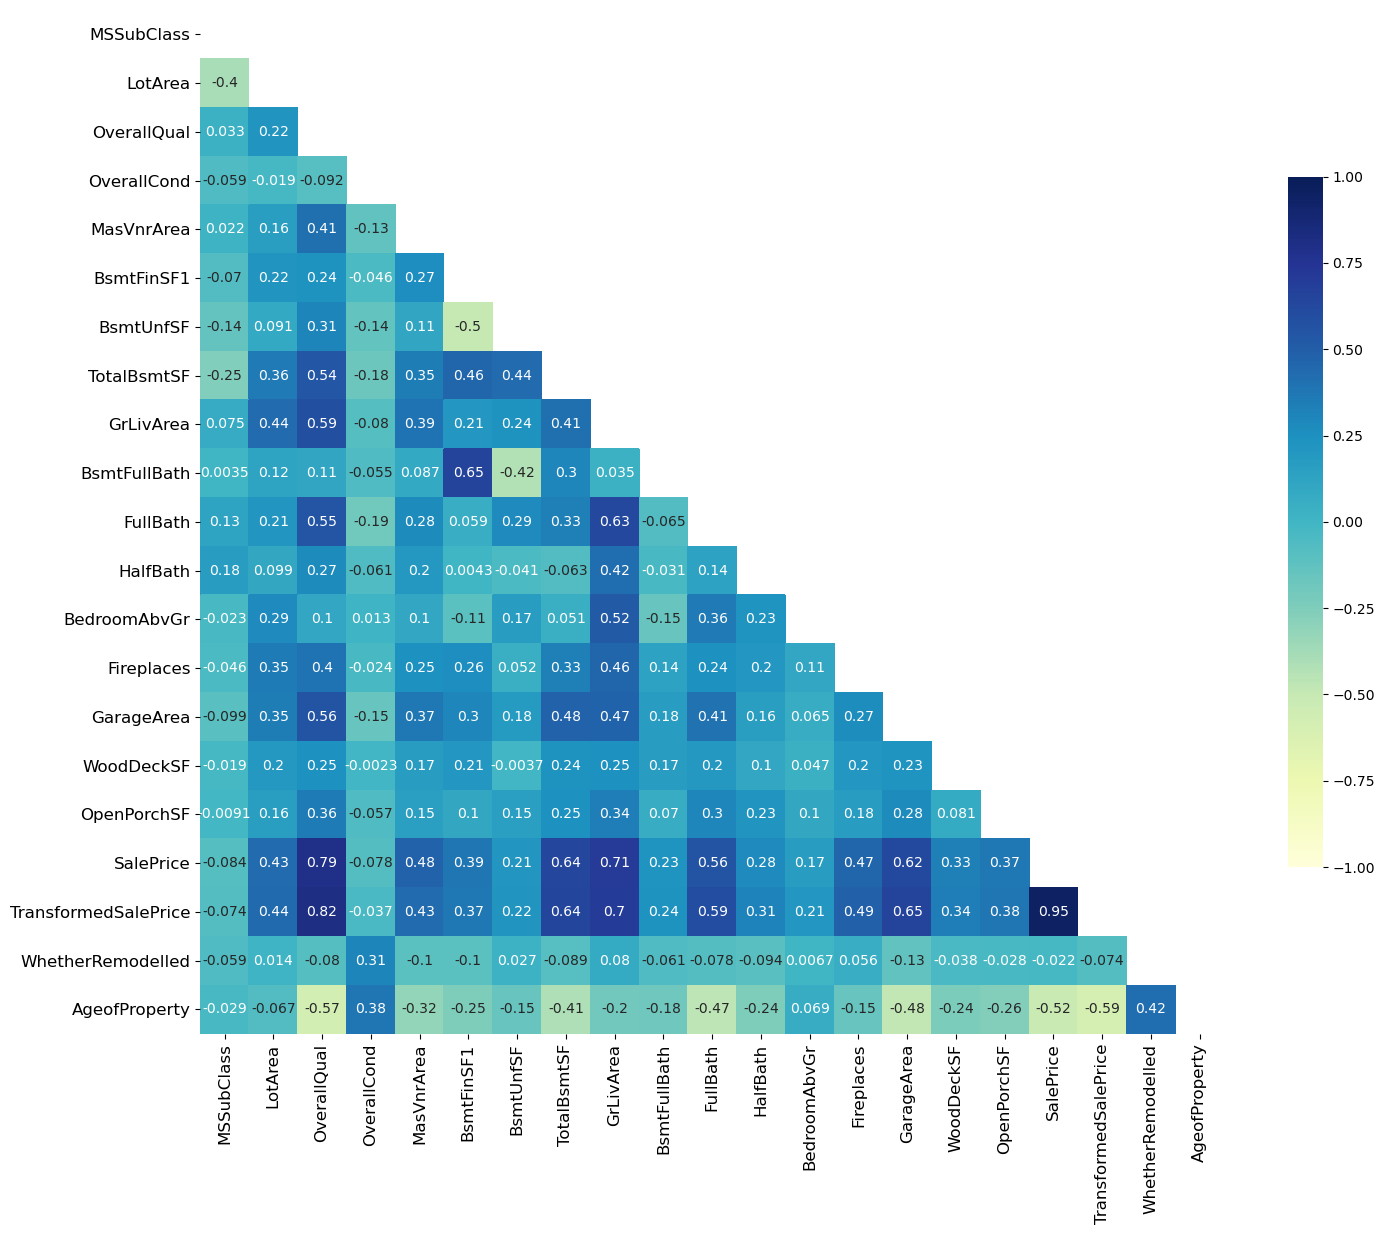

In [40]:
#Rechecking the heatmap to understand correlation amongst all numeric variables (ignore the categorical numeric ones)
numeric_vars1= df.select_dtypes(include=['int32','float32','int64','float64']).columns
plt.figure(figsize = (12,10), dpi=120)
corr_matrix_new1 = df[numeric_vars1].corr()
my_mask_2 = np.triu(np.ones_like(corr_matrix_new1, dtype=np.bool))
f, ax_corr2 = plt.subplots(figsize=(15, 15), dpi=100)
ax_corr2 = sns.heatmap(corr_matrix_new1, cmap= 'YlGnBu', cbar_kws={"shrink": .5}, vmin= -1, vmax=1, center=0,
            square=True, mask=my_mask_2, annot=True)
plt.xticks(fontsize=12, rotation=90)
plt.yticks(fontsize=12)
plt.tight_layout()
plt.autoscale()
plt.show()

## <font color='Blue'>  Data Preparation

**Using Data Dictionary, to convert the categorical variables into numeric variables**

In [41]:
# Since the values of the following fields are ordered list, we shall assign values to them in sequence

# For values which can be ordered, we have given an ordered sequence value
# For values which cannot be ordered, we have categorised them into 0 and 1

##For ordinals, let's assign them their respective weights.
df['d_LotShape'] = df['LotShape'].map({'Reg': 3, 'IR1': 2, 'IR2': 1, 'IR3': 0}) #3 indicates better i.e. Regular LotShape
df['d_ExterQual'] = df['ExterQual'].map({'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1, 'None': 0 })
df['d_BsmtQual'] = df['BsmtQual'].map({'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1, 'None': 0})

df['d_BsmtExposure'] = df['BsmtExposure'].map({'Gd': 4, 'Av': 3, 'Mn': 2, 'No': 1, 'None': 0})
df['d_BsmtFinType1'] = df['BsmtFinType1'].map({'GLQ': 6, 'ALQ': 5, 'BLQ': 4, 'Rec': 3, 'LwQ': 2, 'Unf': 1, 'None': 0})
df['d_HeatingQC'] = df['HeatingQC'].map({'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1, 'None': 0})

df['d_KitchenQual'] = df['KitchenQual'].map({'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1, 'None': 0})
df['d_FireplaceQu'] = df['FireplaceQu'].map({'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1, 'None': 0})
df['d_GarageFinish'] = df['GarageFinish'].map({'Fin': 3, 'RFn': 2, 'Unf': 1, 'None': 0 })

df = df.drop(['LotShape', 'ExterQual', 'BsmtQual', 'BsmtExposure', 'BsmtFinType1', 'HeatingQC', \
                                'KitchenQual', 'FireplaceQu', 'GarageFinish' ], axis=1)

df.head()

,MSSubClass,MSZoning,LotArea,LotConfig,Neighborhood,HouseStyle,OverallQual,OverallCond,RoofStyle,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,Foundation,BsmtFinSF1,BsmtUnfSF,TotalBsmtSF,GrLivArea,BsmtFullBath,FullBath,HalfBath,BedroomAbvGr,Fireplaces,GarageType,GarageArea,WoodDeckSF,OpenPorchSF,SalePrice,TransformedSalePrice,WhetherRemodelled,AgeofProperty,d_LotShape,d_ExterQual,d_BsmtQual,d_BsmtExposure,d_BsmtFinType1,d_HeatingQC,d_KitchenQual,d_FireplaceQu,d_GarageFinish
0,60,RL,8450.0,Inside,CollgCr,2Story,7,5,Gable,VinylSd,VinylSd,BrkFace,196.0,PConc,706,150,856.0,1710,1,2,1,3,0,Attchd,548,0.0,61.0,208500,12.247694,0,5,3,4,4,1,6,5,4,0,2
1,20,RL,9600.0,FR2,Veenker,1Story,6,8,Gable,MetalSd,MetalSd,None,0.0,CBlock,978,284,1262.0,1262,0,2,0,3,1,Attchd,460,298.0,0.0,181500,12.109011,0,31,3,3,4,4,5,5,3,3,2
2,60,RL,11250.0,Inside,CollgCr,2Story,7,5,Gable,VinylSd,VinylSd,BrkFace,162.0,PConc,486,434,920.0,1786,1,2,1,3,1,Attchd,608,0.0,42.0,223500,12.317167,1,7,2,4,4,2,6,5,4,3,2
3,70,RL,9550.0,Corner,Crawfor,2Story,7,5,Gable,Wd Sdng,Wd Shng,None,0.0,BrkTil,216,540,756.0,1717,1,1,0,3,1,Detchd,642,0.0,35.0,140000,11.849398,1,91,2,3,3,1,5,4,4,4,1
4,60,RL,14260.0,FR2,NoRidge,2Story,8,5,Gable,VinylSd,VinylSd,BrkFace,350.0,PConc,655,490,1145.0,2198,1,2,1,4,1,Attchd,836,192.0,84.0,250000,12.429216,0,8,2,4,4,3,6,5,4,3,2


In [42]:
#Creating dummies for nominal variables


##Creating dummies for 'MSSubClass'
d_MSSubClass = pd.get_dummies(df['MSSubClass'], prefix='MSSubClass', drop_first = True)
df = pd.concat([df, d_MSSubClass], axis = 1)

##Creating dummies for 'LotConfigs'
d_LotConfigs = pd.get_dummies(df['LotConfig'], prefix='LotConfig', drop_first = True)
df = pd.concat([df, d_LotConfigs], axis = 1)

##Creating dummies for 'MSZoning'
d_MSZoning = pd.get_dummies(df['MSZoning'], prefix='MSZoning', drop_first = True)
df = pd.concat([df, d_MSZoning], axis = 1)

##Creating dummies for 'Neighborhood'
d_Neighborhood = pd.get_dummies(df['Neighborhood'], prefix='Neighborhood', drop_first = True)
df = pd.concat([df, d_Neighborhood], axis = 1)

##Creating dummies for 'Exterior2nd'
d_Exterior2nd = pd.get_dummies(df['Exterior2nd'], prefix='Exterior2nd', drop_first = True)
df = pd.concat([df, d_Exterior2nd], axis = 1)

##Creating dummies for 'HouseStyle'
d_HouseStyle = pd.get_dummies(df['HouseStyle'], prefix='HouseStyle', drop_first = True)
df = pd.concat([df, d_HouseStyle], axis = 1)

##Creating dummies for 'Foundation'
d_Foundation = pd.get_dummies(df['Foundation'], prefix='Foundation', drop_first = True)
df = pd.concat([df, d_Foundation], axis = 1)

##Creating dummies for 'MasVnrType'
d_MasVnrType = pd.get_dummies(df['MasVnrType'], prefix='MasVnrTyp', drop_first = True)
df = pd.concat([df, d_MasVnrType], axis = 1)

##Creating dummies for 'RoofStyle'
d_RoofStyle = pd.get_dummies(df['RoofStyle'], prefix='RoofStyle', drop_first = True)
df = pd.concat([df, d_RoofStyle], axis = 1)

##Creating dummies for 'Exterior1st'
d_Exterior1st = pd.get_dummies(df['Exterior1st'], prefix='Exterior1st', drop_first = True)
df = pd.concat([df, d_Exterior1st], axis = 1)

##Creating dummies for 'GarageType'
d_GarageType = pd.get_dummies(df['GarageType'], prefix='GarageType', drop_first = True)
df = pd.concat([df, d_GarageType], axis = 1)


##Dropping columns for which we have created dummies, as we now have new columns derived from these columns
orig_before_dum_cols = ['MSSubClass','MSZoning', 'Neighborhood', 'RoofStyle', 'Exterior1st', 'Exterior2nd', 'Foundation', \
              'GarageType',  'LotConfig' ,'HouseStyle', 'MasVnrType']
df = df.drop(orig_before_dum_cols, axis=1)

In [43]:
df.head()

,LotArea,OverallQual,OverallCond,MasVnrArea,BsmtFinSF1,BsmtUnfSF,TotalBsmtSF,GrLivArea,BsmtFullBath,FullBath,HalfBath,BedroomAbvGr,Fireplaces,GarageArea,WoodDeckSF,OpenPorchSF,SalePrice,TransformedSalePrice,WhetherRemodelled,AgeofProperty,d_LotShape,d_ExterQual,d_BsmtQual,d_BsmtExposure,d_BsmtFinType1,d_HeatingQC,d_KitchenQual,d_FireplaceQu,d_GarageFinish,MSSubClass_30,MSSubClass_40,MSSubClass_45,MSSubClass_50,MSSubClass_60,MSSubClass_70,MSSubClass_75,MSSubClass_80,MSSubClass_85,MSSubClass_90,MSSubClass_120,...,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,MasVnrTyp_BrkFace,MasVnrTyp_None,MasVnrTyp_Stone,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_None
0,8450.0,7,5,196.0,706,150,856.0,1710,1,2,1,3,0,548,0.0,61.0,208500,12.247694,0,5,3,4,4,1,6,5,4,0,2,0,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0
1,9600.0,6,8,0.0,978,284,1262.0,1262,0,2,0,3,1,460,298.0,0.0,181500,12.109011,0,31,3,3,4,4,5,5,3,3,2,0,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0
2,11250.0,7,5,162.0,486,434,920.0,1786,1,2,1,3,1,608,0.0,42.0,223500,12.317167,1,7,2,4,4,2,6,5,4,3,2,0,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0
3,9550.0,7,5,0.0,216,540,756.0,1717,1,1,0,3,1,642,0.0,35.0,140000,11.849398,1,91,2,3,3,1,5,4,4,4,1,0,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0
4,14260.0,8,5,350.0,655,490,1145.0,2198,1,2,1,4,1,836,192.0,84.0,250000,12.429216,0,8,2,4,4,3,6,5,4,3,2,0,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0


In [44]:
##Rechecking and eliminating those predictor variables that have a correlation of (threshold:-0.7 to 0.7) with other predictors.

df_corr = df.drop(['SalePrice','TransformedSalePrice'],axis =1)
my_corr_matrix = df_corr.corr().abs()
my_corr_matrix

upper_triangle = my_corr_matrix.where(np.triu(np.ones(my_corr_matrix.shape), k=1).astype(np.bool))
col_to_drop = [col for col in upper_triangle.columns if any(upper_triangle[col] > 0.75)]  #Reduces multicollinearity (if any)
col_to_drop  #columns to drop from df. Independent predictors highly correlated to each other

['d_FireplaceQu',
 'MSZoning_RM',
 'Neighborhood_Somerst',
 'HouseStyle_1.5Unf',
 'HouseStyle_2Story',
 'HouseStyle_SLvl',
 'Foundation_PConc',
 'MasVnrTyp_None',
 'RoofStyle_Hip',
 'Exterior1st_CBlock',
 'Exterior1st_CemntBd',
 'Exterior1st_HdBoard',
 'Exterior1st_MetalSd',
 'Exterior1st_Plywood',
 'Exterior1st_Stucco',
 'Exterior1st_VinylSd',
 'Exterior1st_Wd Sdng']

In [45]:
##Dropping independent predictors highly correlated to each other
df = df.drop(col_to_drop, axis=1)

In [46]:
#Recheck Model 
df.shape

(1460, 113)

In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Columns: 113 entries, LotArea to GarageType_None
dtypes: float64(6), int64(22), uint8(85)
memory usage: 440.7 KB


#### Now We Have All the Columns in Numerical Data

In [48]:
##Creating a copy of this dataframe for 'Question 3'
df_new1 = df.copy()

In [49]:
df_new1.SalePrice.dtypes

dtype('int64')

In [50]:
##Creating a function to find binary value columns from the 'df' dataframe (if any)
def binary_val_cols(df):
    df_1 = df.copy()
    dualsvcol = (df_1.nunique()==2)
    list_dualsvcol = list(dualsvcol[dualsvcol.values==True].index)
    return list_dualsvcol

binary_cols = binary_val_cols(df)
print(binary_cols)

['WhetherRemodelled', 'MSSubClass_30', 'MSSubClass_40', 'MSSubClass_45', 'MSSubClass_50', 'MSSubClass_60', 'MSSubClass_70', 'MSSubClass_75', 'MSSubClass_80', 'MSSubClass_85', 'MSSubClass_90', 'MSSubClass_120', 'MSSubClass_160', 'MSSubClass_180', 'MSSubClass_190', 'LotConfig_CulDSac', 'LotConfig_FR2', 'LotConfig_FR3', 'LotConfig_Inside', 'MSZoning_FV', 'MSZoning_RH', 'MSZoning_RL', 'Neighborhood_Blueste', 'Neighborhood_BrDale', 'Neighborhood_BrkSide', 'Neighborhood_ClearCr', 'Neighborhood_CollgCr', 'Neighborhood_Crawfor', 'Neighborhood_Edwards', 'Neighborhood_Gilbert', 'Neighborhood_IDOTRR', 'Neighborhood_MeadowV', 'Neighborhood_Mitchel', 'Neighborhood_NAmes', 'Neighborhood_NPkVill', 'Neighborhood_NWAmes', 'Neighborhood_NoRidge', 'Neighborhood_NridgHt', 'Neighborhood_OldTown', 'Neighborhood_SWISU', 'Neighborhood_Sawyer', 'Neighborhood_SawyerW', 'Neighborhood_StoneBr', 'Neighborhood_Timber', 'Neighborhood_Veenker', 'Exterior2nd_AsphShn', 'Exterior2nd_Brk Cmn', 'Exterior2nd_BrkFace', 'Ext

## <font color='Blue'>  Train Test Split

In [51]:
np.random.seed(0)
df_train, df_test = train_test_split(df, train_size=0.7, test_size = 0.3, random_state=100)

In [52]:
##Dataframe with binary columns
df_binary_train = df_train.loc[:, binary_cols]
df_binary_test = df_test.loc[:, binary_cols]

##Dropping binary dummy variables and we shall concat them later to preserve the scale
df_train = df_train.drop(binary_cols, axis=1)
df_test = df_test.drop(binary_cols, axis=1)

##StandardScaler

from sklearn.preprocessing import StandardScaler
all_cols = df_train.columns
scaler = StandardScaler()

#scaler fit_transform on train data
df_train[all_cols] = scaler.fit_transform(df_train[all_cols])
#concat dummies:Train set
df_train = pd.concat([df_train, df_binary_train], axis=1)

#scaler transform on test data
df_test[all_cols] = scaler.transform(df_test[all_cols])
#concat dummies: Test set
df_test = pd.concat([df_test, df_binary_test], axis=1)

In [53]:
df_train.head()

,LotArea,OverallQual,OverallCond,MasVnrArea,BsmtFinSF1,BsmtUnfSF,TotalBsmtSF,GrLivArea,BsmtFullBath,FullBath,HalfBath,BedroomAbvGr,Fireplaces,GarageArea,WoodDeckSF,OpenPorchSF,SalePrice,TransformedSalePrice,AgeofProperty,d_LotShape,d_ExterQual,d_BsmtQual,d_BsmtExposure,d_BsmtFinType1,d_HeatingQC,d_KitchenQual,d_GarageFinish,WhetherRemodelled,MSSubClass_30,MSSubClass_40,MSSubClass_45,MSSubClass_50,MSSubClass_60,MSSubClass_70,MSSubClass_75,MSSubClass_80,MSSubClass_85,MSSubClass_90,MSSubClass_120,MSSubClass_160,...,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_SFoyer,Foundation_CBlock,Foundation_Slab,Foundation_Stone,Foundation_Wood,MasVnrTyp_BrkFace,MasVnrTyp_Stone,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Mansard,RoofStyle_Shed,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_ImStucc,Exterior1st_Stone,Exterior1st_WdShing,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_None
210,-1.117162,-0.779861,0.383154,-0.562315,0.043512,-0.374367,-0.456947,-1.228053,1.066863,-1.026085,-0.751723,-1.042717,-0.925422,-2.217786,-0.777334,-0.814228,-1.042855,-1.335437,1.529604,0.692628,-0.698260,-0.532226,-0.605626,-0.279557,-1.179071,-0.776063,-1.902619,1,1,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
318,0.081095,0.649651,-0.533005,0.804951,1.160345,-0.454644,0.722974,2.123103,1.066863,0.786428,1.246998,1.396261,0.623522,0.867506,2.153201,0.323641,1.006390,1.125545,-0.677573,0.692628,1.053395,0.579028,2.146648,1.140483,0.873498,0.741868,0.321278,0,0,0,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
239,-0.242178,-0.065105,-1.449164,-0.562315,-0.761296,0.171964,-0.772081,-0.056465,-0.837450,-1.026085,1.246998,0.176772,0.623522,-1.183084,-0.777334,1.840799,-0.853110,-0.976219,0.936631,0.692628,-0.698260,-0.532226,-0.605626,-0.752904,-1.179071,-0.776063,-0.790670,1,0,0,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
986,-1.199166,-0.065105,2.215472,-0.562315,-0.963574,-0.175904,-1.382806,0.221858,-0.837450,-1.026085,-0.751723,-1.042717,-0.925422,-1.018473,2.618639,-0.814228,-0.802511,-0.888480,1.957862,0.692628,-0.698260,-0.532226,-0.605626,-1.226251,-0.152787,0.741868,-0.790670,1,0,0,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
1416,0.482745,-1.494617,0.383154,-0.562315,-0.963574,0.475233,-0.669479,1.453624,-0.837450,0.786428,-0.751723,1.396261,-0.925422,0.416000,-0.777334,-0.814228,-0.732938,-0.772616,2.913207,0.692628,-0.698260,-0.532226,-0.605626,-1.226251,-0.152787,-0.776063,-0.790670,1,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0


In [54]:
print(df_train.shape)
print(df_test.shape)

(1021, 113)
(438, 113)


## Model Building

In [55]:
# Preparing Test and Train Set
X_train = df_train.drop(['SalePrice','TransformedSalePrice'], axis=1).values
y_train = df_train['TransformedSalePrice'].values

In [56]:
X_test = df_test.drop(['SalePrice','TransformedSalePrice'], axis=1).values
y_test = df_test['TransformedSalePrice'].values

In [57]:
# linear regression with all predictors
# Instantiate
lm = LinearRegression()

# Fit a line
lm.fit(X_train, y_train)

LinearRegression()

In [58]:
# predictions
y_pred_train = lm.predict(X_train)
y_pred_test = lm.predict(X_test)

metric = []
r2_train_lr = r2_score(y_train, y_pred_train)
print(r2_train_lr)
metric.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print(r2_test_lr)
metric.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print(rss1_lr)
metric.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print(rss2_lr)
metric.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print(mse_train_lr)
metric.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print(mse_test_lr)
metric.append(mse_test_lr**0.5)

0.9166872902492831
-1.7066061574412797e+23
85.062276655482
7.824397696950228e+25
0.08331270975071695
1.7863921682534767e+23


In [59]:
# Print the coefficients and intercept
print(lm.intercept_)
print(lm.coef_)

-0.2716652769683978
[ 7.81595331e-02  1.69499894e-01  1.34279795e-01  5.58257368e-03
 -1.67914846e-01 -1.80871308e-01  3.08845224e-01  1.89591555e-01
  3.89135090e-02  6.24223003e-02  5.42303627e-02  1.08284132e-02
  5.55484641e-02  7.57149794e-02  2.17753754e-02  1.31364619e-02
 -1.65422284e-01  2.47800784e-02 -6.11458934e-03  2.44452857e-02
  3.16674741e-02  5.31610682e-02  2.54991326e-02  4.76098768e-02
  2.95164128e-02  1.41507889e-02 -2.00901416e-01 -1.58392058e-01
 -1.24661123e-01 -6.06940191e-03 -9.24280771e-02  1.73618542e-01
  2.64852683e-01 -9.99189438e-02  2.12183445e-02 -9.91965288e-02
 -1.23650993e-01 -3.24557584e-01 -1.79679891e-01 -8.21922061e-02
  9.01631233e-02 -1.05166237e-01 -1.65063964e-01  4.55746596e-03
  2.26768781e-01  1.33197896e-01  7.89209636e-02 -2.25381164e-01
 -2.23749391e-01 -6.26101244e-02  3.77208070e-02 -1.51162135e-01
  1.50047812e-01 -2.99353516e-01 -7.99189630e-02 -3.85271024e-01
 -4.88846664e-01 -2.08352471e-01 -2.14807841e-01 -1.71664417e-01
 -2.3

In [60]:
# Simple Linear Regression model parameters
#out_col='TransformedSalePrice'
#y = df_train.loc[:, out_col]
#X = df_train.loc[:, df_train.columns != ['TransformedSalePrice','SalePrice']]

model_parameters = list(lm.coef_)
model_parameters.insert(0, lm.intercept_)
model_parameters = [round(x, 3) for x in model_parameters]
cols = df_train.drop(['SalePrice','TransformedSalePrice'], axis=1).columns
cols = cols.insert(0, "constant")
sorted(list(zip(model_parameters,cols)), key=lambda x:abs(x[0]), reverse=True)

[(6254753211236.857, 'Exterior1st_AsphShn'),
 (-6254753211236.456, 'Exterior2nd_AsphShn'),
 (10074847455.344, 'Exterior2nd_Other'),
 (-0.812, 'Exterior1st_BrkComm'),
 (-0.489, 'Neighborhood_MeadowV'),
 (-0.385, 'Neighborhood_IDOTRR'),
 (0.352, 'Exterior2nd_Brk Cmn'),
 (0.328, 'Foundation_Stone'),
 (-0.325, 'MSSubClass_160'),
 (0.31, 'Foundation_Slab'),
 (0.309, 'TotalBsmtSF'),
 (-0.299, 'Neighborhood_Edwards'),
 (0.287, 'Exterior2nd_Stone'),
 (-0.272, 'constant'),
 (-0.268, 'Neighborhood_Sawyer'),
 (0.265, 'MSSubClass_75'),
 (0.252, 'Neighborhood_StoneBr'),
 (0.243, 'GarageType_BuiltIn'),
 (0.241, 'Exterior2nd_CmentBd'),
 (-0.238, 'Neighborhood_NWAmes'),
 (0.238, 'GarageType_Attchd'),
 (-0.234, 'Neighborhood_OldTown'),
 (0.227, 'MSZoning_FV'),
 (0.227, 'Exterior2nd_BrkFace'),
 (-0.225, 'Neighborhood_Blueste'),
 (-0.224, 'Neighborhood_BrDale'),
 (0.223, 'Exterior2nd_VinylSd'),
 (-0.215, 'Neighborhood_NAmes'),
 (0.211, 'Exterior2nd_MetalSd'),
 (-0.208, 'Neighborhood_Mitchel'),
 (0.203, '

In [61]:
# Simple regression model parametrs
lm_coef = pd.DataFrame(list(zip(cols,model_parameters)))
lm_coef.columns = ['Featuere','Coef']
lm_coef.sort_values(by='Coef',ascending=False).head(10)

,Featuere,Coef
100,Exterior1st_AsphShn,6.254753e+12
79,Exterior2nd_Other,1.007485e+10
72,Exterior2nd_Brk Cmn,3.520000e-01
92,Foundation_Stone,3.280000e-01
91,Foundation_Slab,3.100000e-01
7,TotalBsmtSF,3.090000e-01
81,Exterior2nd_Stone,2.870000e-01
33,MSSubClass_75,2.650000e-01
68,Neighborhood_StoneBr,2.520000e-01
108,GarageType_BuiltIn,2.430000e-01


##  Lasso Regression

In [62]:
# list of alphas
params = {
    'alpha':[0.0001,0.001,0.01,0.05,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,\
             9.0,10.0,20.0,50.0,100.0,500.0,1000.0]
}
print(params)

{'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20.0, 50.0, 100.0, 500.0, 1000.0]}


In [63]:
# Lasso

lasso = Lasso()

# cross validation
folds = 5
model_cv = GridSearchCV(estimator=lasso,
                       param_grid=params,
                       scoring='neg_mean_absolute_error',
                       cv= folds,
                       return_train_score=True,
                       verbose= 1)
model_cv.fit(X_train, y_train)

Fitting 5 folds for each of 28 candidates, totalling 140 fits

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[Parallel(n_jobs=1)]: Done 140 out of 140 | elapsed:    0.9s finished


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20.0,
                                   50.0, 100.0, 500.0, 1000.0]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [64]:
# Printing the best hyperparameter alpha
print(model_cv.best_params_)

{'alpha': 0.001}


In [65]:
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.046770,0.018648,0.001001,6.975526e-07,0.0001,{'alpha': 0.0001},-0.233522,-0.227034,-0.247304,-0.213734,-0.239247,-0.232168,0.011377,2,-0.202233,-0.188690,-0.189768,-0.207041,-0.201808,-0.197908,0.007329
1,0.012791,0.003187,0.001202,4.016164e-04,0.001,{'alpha': 0.001},-0.224047,-0.223383,-0.242518,-0.202341,-0.232197,-0.224897,0.013233,1,-0.206915,-0.193334,-0.192275,-0.210288,-0.202459,-0.201054,0.007187
2,0.005595,0.001020,0.001001,9.702201e-07,0.01,{'alpha': 0.01},-0.222151,-0.248116,-0.248676,-0.200697,-0.244903,-0.232908,0.018853,3,-0.231975,-0.213513,-0.217763,-0.231892,-0.224497,-0.223928,0.007416
3,0.005197,0.001721,0.000400,4.900961e-04,0.05,{'alpha': 0.05},-0.223383,-0.270024,-0.256461,-0.210433,-0.261439,-0.244348,0.023185,4,-0.247018,-0.224578,-0.234026,-0.251323,-0.245356,-0.240460,0.009784
4,0.003598,0.001199,0.000799,3.994477e-04,0.1,{'alpha': 0.1},-0.256206,-0.307163,-0.284286,-0.254502,-0.299854,-0.280402,0.021752,5,-0.283388,-0.261615,-0.271545,-0.285959,-0.282793,-0.277060,0.009177


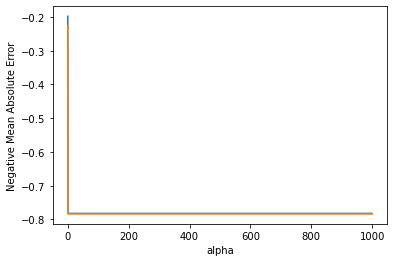

In [66]:
# Plot mean test and train scores against alpha

cv_results['param_alpha'] = cv_results['param_alpha'].astype('float32')

# Plotting

plt.plot(cv_results['param_alpha'] , cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'] , cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')
# Give title
# Give legend
plt.show();

In [67]:
#Fitting Lasso model for alpha = 0.001 and printing coefficients which have been penalised

alpha = 0.001

lasso = Lasso(alpha=alpha)
lasso.fit(X_train, y_train)

Lasso(alpha=0.001)

In [68]:
lasso.coef_

array([ 0.08733773,  0.19678303,  0.13791006,  0.01154784, -0.15889808,
       -0.1717059 ,  0.30424062,  0.18974188,  0.03559663,  0.06194843,
        0.0522266 ,  0.01956075,  0.05925696,  0.07409063,  0.02280992,
        0.01342098, -0.17550477,  0.01931527,  0.00620332,  0.00463858,
        0.0282136 ,  0.04854384,  0.02947247,  0.05102193,  0.03336346,
        0.01558123, -0.1644658 , -0.        , -0.        ,  0.04882563,
       -0.        ,  0.18858464,  0.06241174, -0.        ,  0.        ,
       -0.01195182, -0.02115916, -0.17059199, -0.        , -0.        ,
        0.07825892, -0.059789  , -0.        ,  0.0014873 ,  0.29220231,
        0.06314709,  0.10891181, -0.        , -0.        ,  0.06259581,
        0.10417749, -0.0377471 ,  0.24182002, -0.15871044,  0.        ,
       -0.16939977, -0.17998115, -0.05302479, -0.05841803,  0.        ,
       -0.08087186,  0.1897109 ,  0.20879929, -0.04827492,  0.        ,
       -0.10691885, -0.03611754,  0.20541574,  0.        ,  0.  

In [69]:
# Lets calculate some metrics such as R2 score, RSS and RMSE
y_pred_train = lasso.predict(X_train)
y_pred_test = lasso.predict(X_test)

metric2 = []
r2_train_lr = r2_score(y_train, y_pred_train)
print(r2_train_lr)
metric2.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print(r2_test_lr)
metric2.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print(rss1_lr)
metric2.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print(rss2_lr)
metric2.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print(mse_train_lr)
metric2.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print(mse_test_lr)
metric2.append(mse_test_lr**0.5)

0.91180589664704
0.8902423812357784
90.0461795233721
50.32135010980505
0.08819410335295995
0.11488892719133574


In [70]:
# lasso model parameters
model_parameters = list(lasso.coef_)
model_parameters.insert(0, lasso.intercept_)
model_parameters = [round(x, 3) for x in model_parameters]
cols = df_train.drop(['SalePrice','TransformedSalePrice'], axis=1).columns
cols = cols.insert(0, "constant")
lasso_selected_features = []
for k,v in sorted(list(zip(model_parameters,cols)), key=lambda x:abs(x[0]), reverse=True)[1:31]:
    lasso_selected_features.append(v)
sorted(list(zip(model_parameters,cols)), key=lambda x:abs(x[0]), reverse=True)

[(0.304, 'TotalBsmtSF'),
 (0.292, 'MSZoning_FV'),
 (0.242, 'Neighborhood_Crawfor'),
 (0.209, 'Neighborhood_NridgHt'),
 (0.205, 'Neighborhood_StoneBr'),
 (0.197, 'OverallQual'),
 (0.19, 'GrLivArea'),
 (0.19, 'Neighborhood_NoRidge'),
 (0.189, 'MSSubClass_70'),
 (0.182, 'Exterior1st_BrkFace'),
 (-0.18, 'Neighborhood_MeadowV'),
 (-0.176, 'AgeofProperty'),
 (-0.172, 'BsmtUnfSF'),
 (-0.171, 'MSSubClass_160'),
 (-0.169, 'Neighborhood_IDOTRR'),
 (-0.164, 'MSSubClass_30'),
 (-0.159, 'BsmtFinSF1'),
 (-0.159, 'Neighborhood_Edwards'),
 (-0.143, 'GarageType_CarPort'),
 (0.138, 'OverallCond'),
 (0.128, 'Foundation_Slab'),
 (-0.123, 'constant'),
 (0.109, 'MSZoning_RL'),
 (-0.107, 'Neighborhood_Sawyer'),
 (0.104, 'Neighborhood_ClearCr'),
 (0.087, 'LotArea'),
 (-0.081, 'Neighborhood_NWAmes'),
 (0.078, 'LotConfig_CulDSac'),
 (0.074, 'GarageArea'),
 (0.068, 'Exterior2nd_VinylSd'),
 (0.063, 'MSZoning_RH'),
 (0.063, 'Neighborhood_BrkSide'),
 (0.062, 'FullBath'),
 (0.062, 'MSSubClass_75'),
 (-0.06, 'LotConf

In [77]:
lasso_coef = pd.DataFrame(list(zip(cols,model_parameters)))
lasso_coef.columns = ['Featuere','Coef']
lasso_coef.sort_values(by='Coef',ascending=False).head(10)

lass=lasso_coef.sort_values(by='Coef',ascending=False).head(10)
lass.tail()

,Featuere,Coef
2,OverallQual,0.197
62,Neighborhood_NoRidge,0.190
8,GrLivArea,0.190
32,MSSubClass_70,0.189
102,Exterior1st_BrkFace,0.182


## Performing Ridge Regression

In [73]:
# Ridge

ridge = Ridge()

# cross validation
folds = 5
model_cv = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error',  
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
model_cv.fit(X_train, y_train) 

Fitting 5 folds for each of 28 candidates, totalling 140 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 140 out of 140 | elapsed:    0.9s finished


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20.0,
                                   50.0, 100.0, 500.0, 1000.0]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [74]:
# Printing the best hyperparameter alpha
print(model_cv.best_params_)

{'alpha': 20.0}


In [75]:
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.004399,0.000490,0.000999,0.000003,0.0001,{'alpha': 0.0001},-0.237063,-0.230686,-0.250047,-0.216093,-0.239621,-0.234702,0.011204,26,-0.201260,-0.187907,-0.189375,-0.206767,-0.201644,-0.197390,0.007418
1,0.004196,0.000747,0.001000,0.000632,0.001,{'alpha': 0.001},-0.237053,-0.230671,-0.250041,-0.216058,-0.239616,-0.234688,0.011214,25,-0.201261,-0.187908,-0.189375,-0.206768,-0.201643,-0.197391,0.007418
2,0.003999,0.000632,0.000999,0.000001,0.01,{'alpha': 0.01},-0.236955,-0.230522,-0.249985,-0.215737,-0.239565,-0.234553,0.011308,24,-0.201275,-0.187922,-0.189377,-0.206783,-0.201628,-0.197397,0.007418
3,0.004798,0.001165,0.000600,0.000490,0.05,{'alpha': 0.05},-0.236557,-0.229928,-0.249745,-0.214719,-0.239360,-0.234062,0.011589,23,-0.201367,-0.187992,-0.189419,-0.206839,-0.201568,-0.197437,0.007408
4,0.004797,0.001327,0.000999,0.000632,0.1,{'alpha': 0.1},-0.236084,-0.229310,-0.249487,-0.213734,-0.239130,-0.233549,0.011851,22,-0.201523,-0.188153,-0.189471,-0.206895,-0.201505,-0.197510,0.007380


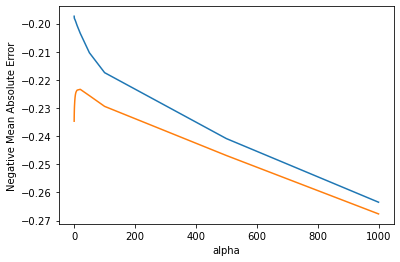

In [76]:
# Plot mean test and train scores against alpha

cv_results['param_alpha'] = cv_results['param_alpha'].astype('float32')

# Plotting

plt.plot(cv_results['param_alpha'] , cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'] , cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')
# Give title
# Give legend
plt.show();

In [77]:
#Fitting Ridge model for alpha = 20 and printing coefficients which have been penalised

alpha = 20.0
ridge = Ridge(alpha=alpha)

ridge.fit(X_train, y_train)
print(ridge.coef_)

[ 9.34653289e-02  2.05848325e-01  1.29353249e-01  1.51295023e-02
 -1.30901212e-01 -1.36682004e-01  2.54380338e-01  1.79835134e-01
  4.06933076e-02  7.11400839e-02  5.58683969e-02  2.66692536e-02
  6.25009406e-02  8.00930564e-02  2.38818682e-02  1.56775915e-02
 -1.59214540e-01  1.74421634e-02  1.36842711e-02  1.15680423e-02
  3.11558422e-02  5.50703890e-02  3.26049116e-02  5.59261526e-02
  3.48171206e-02  1.97587745e-02 -1.41429530e-01 -1.98492625e-02
 -1.38353006e-02  3.59785008e-02 -2.20242597e-02  1.38004302e-01
  3.77575783e-02 -2.27048430e-02  9.16611585e-03 -2.52436815e-02
 -1.80296004e-02 -1.06245793e-01 -4.08971161e-02 -3.06231255e-02
  7.55398006e-02 -6.21888915e-02 -1.54349484e-02  5.43816532e-03
  1.62734868e-01  5.60182142e-02  9.58208008e-02 -6.61164127e-03
 -4.97370458e-02  5.69106547e-02  7.92021955e-02 -6.20020723e-02
  1.70572182e-01 -1.39528447e-01 -2.00923135e-02 -1.27268406e-01
 -8.76266995e-02 -5.42082867e-02 -4.78338893e-02 -4.01861593e-03
 -7.80963971e-02  1.08375

In [78]:
# Lets calculate some metrics such as R2 score, RSS and RMSE
y_pred_train = ridge.predict(X_train)
y_pred_test = ridge.predict(X_test)

metric3 = []
r2_train_lr = r2_score(y_train, y_pred_train)
print(r2_train_lr)
metric3.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print(r2_test_lr)
metric3.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print(rss1_lr)
metric3.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print(rss2_lr)
metric3.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print(mse_train_lr)
metric3.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print(mse_test_lr)
metric3.append(mse_test_lr**0.5)

0.9089116095576522
0.8877101425470021
93.00124664163712
51.482323453197615
0.09108839044234782
0.11753955126300826


In [79]:
# ridge model parameters
model_parameters = list(ridge.coef_)
model_parameters.insert(0, ridge.intercept_)
model_parameters = [round(x, 3) for x in model_parameters]
cols = df_train.drop(['SalePrice','TransformedSalePrice'], axis=1).columns
cols = cols.insert(0, "constant")
sorted(list(zip(model_parameters,cols)), key=lambda x:abs(x[0]), reverse=True)

[(0.254, 'TotalBsmtSF'),
 (0.206, 'OverallQual'),
 (0.18, 'GrLivArea'),
 (0.171, 'Neighborhood_Crawfor'),
 (0.163, 'MSZoning_FV'),
 (-0.159, 'AgeofProperty'),
 (-0.141, 'MSSubClass_30'),
 (-0.14, 'Neighborhood_Edwards'),
 (0.138, 'MSSubClass_70'),
 (-0.137, 'BsmtUnfSF'),
 (-0.131, 'BsmtFinSF1'),
 (0.129, 'OverallCond'),
 (-0.127, 'Neighborhood_IDOTRR'),
 (0.124, 'Neighborhood_NridgHt'),
 (0.116, 'Exterior1st_BrkFace'),
 (0.108, 'Neighborhood_NoRidge'),
 (-0.106, 'MSSubClass_160'),
 (-0.101, 'constant'),
 (0.096, 'MSZoning_RL'),
 (0.095, 'Neighborhood_StoneBr'),
 (0.093, 'LotArea'),
 (-0.088, 'Neighborhood_MeadowV'),
 (-0.087, 'Neighborhood_Sawyer'),
 (0.086, 'Foundation_Slab'),
 (0.08, 'GarageArea'),
 (0.079, 'Neighborhood_ClearCr'),
 (-0.078, 'Neighborhood_NWAmes'),
 (0.076, 'LotConfig_CulDSac'),
 (0.071, 'FullBath'),
 (-0.069, 'GarageType_CarPort'),
 (0.064, 'GarageType_Attchd'),
 (0.063, 'Fireplaces'),
 (-0.062, 'LotConfig_FR2'),
 (-0.062, 'Neighborhood_CollgCr'),
 (-0.061, 'Foundat

In [80]:
ridge_coef = pd.DataFrame(list(zip(cols,model_parameters)))
ridge_coef.columns = ['Feaure','Coef']
ridge_coef.sort_values(by='Coef',ascending=False).head(10)

,Feaure,Coef
7,TotalBsmtSF,0.254
2,OverallQual,0.206
8,GrLivArea,0.180
53,Neighborhood_Crawfor,0.171
45,MSZoning_FV,0.163
32,MSSubClass_70,0.138
3,OverallCond,0.129
63,Neighborhood_NridgHt,0.124
102,Exterior1st_BrkFace,0.116
62,Neighborhood_NoRidge,0.108


In [81]:
# Creating a table which contain all the metrics

lr_table = {'Metric': ['R2 Score (Train)','R2 Score (Test)','RSS (Train)','RSS (Test)',
                       'MSE (Train)','MSE (Test)'], 
        'Linear Regression': metric
        }

lr_metric = pd.DataFrame(lr_table ,columns = ['Metric', 'Linear Regression'] )

rg_metric = pd.Series(metric2, name = 'Lasso Regression')
ls_metric = pd.Series(metric3, name = 'Ridge Regression')

final_metric = pd.concat([lr_metric, rg_metric, ls_metric], axis = 1)

final_metric

,Metric,Linear Regression,Lasso Regression,Ridge Regression
0,R2 Score (Train),9.166873e-01,0.911806,0.908912
1,R2 Score (Test),-1.706606e+23,0.890242,0.887710
2,RSS (Train),8.506228e+01,90.046180,93.001247
3,RSS (Test),7.824398e+25,50.321350,51.482323
4,MSE (Train),2.886394e-01,0.296975,0.301809
5,MSE (Test),4.226573e+11,0.338953,0.342840


## Lets observe the changes in the coefficients after regularization

In [82]:
betas = pd.DataFrame(index=df_train.drop(['SalePrice','TransformedSalePrice'], axis=1).columns)

In [83]:
betas.rows = df_train.drop(['SalePrice','TransformedSalePrice'], axis=1).columns

In [84]:
betas['Linear'] = lm.coef_
betas['Ridge'] = ridge.coef_
betas['Lasso'] = lasso.coef_

In [85]:
pd.set_option('display.max_rows', None)
betas.head(106)

,Linear,Ridge,Lasso
LotArea,7.815953e-02,0.093465,0.087338
OverallQual,1.694999e-01,0.205848,0.196783
OverallCond,1.342798e-01,0.129353,0.137910
MasVnrArea,5.582574e-03,0.015130,0.011548
BsmtFinSF1,-1.679148e-01,-0.130901,-0.158898
BsmtUnfSF,-1.808713e-01,-0.136682,-0.171706
TotalBsmtSF,3.088452e-01,0.254380,0.304241
GrLivArea,1.895916e-01,0.179835,0.189742
BsmtFullBath,3.891351e-02,0.040693,0.035597
FullBath,6.242230e-02,0.071140,0.061948


# Quetions

1.What is the optimal value of alpha for ridge and lasso regression? What will be the changes in the model if you choose double the value of alpha for both ridge and lasso? What will be the most important predictor variables after the change is implemented?

ANS) optimal value of alpha

ridge=20.0

lasso=0.001

In [86]:
#Fitting Ridge model for alpha = 8 and printing coefficients which have been penalised

alpha = 40.0
ridge = Ridge(alpha=alpha)

ridge.fit(X_train, y_train)
print(ridge.coef_)

[ 0.09626961  0.20972819  0.12401218  0.01741714 -0.10284484 -0.1056848
  0.22239988  0.16992314  0.04244156  0.07459662  0.05606249  0.03173356
  0.06604923  0.08237383  0.02515667  0.01663528 -0.14395186  0.01369216
  0.02056513  0.0150688   0.03105677  0.05504498  0.03654685  0.06098017
  0.03917874  0.01998528 -0.11386846 -0.0101977  -0.00878003  0.02833358
 -0.01720831  0.10270888  0.01901137 -0.01779379  0.00132617 -0.01540116
 -0.00111202 -0.06747977 -0.02457061 -0.02340367  0.06166191 -0.04604753
 -0.00706088  0.00477712  0.11082765  0.03323963  0.08175512 -0.00329525
 -0.03457267  0.0427234   0.05853021 -0.04846023  0.1299809  -0.1111718
 -0.01778883 -0.09237237 -0.05202825 -0.03296843 -0.02559439 -0.00455918
 -0.05266115  0.07510786  0.08998787 -0.04793264  0.01356115 -0.05885348
 -0.03450492  0.05753547  0.00204645  0.01575307  0.00160849 -0.01948595
  0.03259913 -0.00209856 -0.00493763 -0.01547484  0.00373983  0.03916561
  0.          0.00232547  0.01104226 -0.02667761  0.0

In [87]:
# ridge model parameters
model_parameters = list(ridge.coef_)
model_parameters.insert(0, ridge.intercept_)
model_parameters = [round(x, 3) for x in model_parameters]
cols = df_train.drop(['SalePrice','TransformedSalePrice'], axis=1).columns
cols = cols.insert(0, "constant")
sorted(list(zip(model_parameters,cols)), key=lambda x:abs(x[0]), reverse=True)

[(0.222, 'TotalBsmtSF'),
 (0.21, 'OverallQual'),
 (0.17, 'GrLivArea'),
 (-0.144, 'AgeofProperty'),
 (0.13, 'Neighborhood_Crawfor'),
 (0.124, 'OverallCond'),
 (-0.114, 'MSSubClass_30'),
 (0.111, 'MSZoning_FV'),
 (-0.111, 'Neighborhood_Edwards'),
 (-0.106, 'BsmtUnfSF'),
 (-0.103, 'BsmtFinSF1'),
 (0.103, 'MSSubClass_70'),
 (0.096, 'LotArea'),
 (-0.092, 'Neighborhood_IDOTRR'),
 (0.09, 'Neighborhood_NridgHt'),
 (0.085, 'Exterior1st_BrkFace'),
 (0.082, 'GarageArea'),
 (0.082, 'MSZoning_RL'),
 (-0.075, 'constant'),
 (0.075, 'FullBath'),
 (0.075, 'Neighborhood_NoRidge'),
 (-0.067, 'MSSubClass_160'),
 (0.066, 'Fireplaces'),
 (0.062, 'LotConfig_CulDSac'),
 (0.061, 'd_KitchenQual'),
 (0.059, 'Neighborhood_ClearCr'),
 (-0.059, 'Neighborhood_Sawyer'),
 (-0.059, 'Foundation_CBlock'),
 (0.058, 'Neighborhood_StoneBr'),
 (0.056, 'HalfBath'),
 (0.055, 'd_BsmtFinType1'),
 (0.054, 'Foundation_Slab'),
 (0.054, 'GarageType_Attchd'),
 (-0.053, 'Neighborhood_NWAmes'),
 (-0.052, 'Neighborhood_MeadowV'),
 (0.04

In [88]:
ridge_coef = pd.DataFrame(list(zip(cols,model_parameters)))
ridge_coef.columns = ['Feaure','Coef']
ridge_coef.sort_values(by='Coef',ascending=False).head(10)

,Feaure,Coef
7,TotalBsmtSF,0.222
2,OverallQual,0.210
8,GrLivArea,0.170
53,Neighborhood_Crawfor,0.130
3,OverallCond,0.124
45,MSZoning_FV,0.111
32,MSSubClass_70,0.103
1,LotArea,0.096
63,Neighborhood_NridgHt,0.090
102,Exterior1st_BrkFace,0.085


In [90]:
#Fitting Lasso model for alpha = 0.001 and printing coefficients which have been penalised

alpha = 0.002

lasso = Lasso(alpha=alpha)
lasso.fit(X_train, y_train)

Lasso(alpha=0.002)

In [91]:
# lasso model parameters
model_parameters = list(lasso.coef_)
model_parameters.insert(0, lasso.intercept_)
model_parameters = [round(x, 3) for x in model_parameters]
cols = df_train.drop(['SalePrice','TransformedSalePrice'], axis=1).columns
cols = cols.insert(0, "constant")
lasso_selected_features = []
for k,v in sorted(list(zip(model_parameters,cols)), key=lambda x:abs(x[0]), reverse=True)[1:31]:
    lasso_selected_features.append(v)
sorted(list(zip(model_parameters,cols)), key=lambda x:abs(x[0]), reverse=True)

[(0.292, 'TotalBsmtSF'),
 (0.256, 'MSZoning_FV'),
 (0.246, 'Neighborhood_Crawfor'),
 (0.215, 'OverallQual'),
 (0.195, 'GrLivArea'),
 (0.186, 'Neighborhood_NridgHt'),
 (-0.171, 'AgeofProperty'),
 (-0.16, 'BsmtUnfSF'),
 (0.151, 'MSSubClass_70'),
 (-0.148, 'BsmtFinSF1'),
 (0.145, 'Neighborhood_NoRidge'),
 (-0.142, 'MSSubClass_30'),
 (0.137, 'Exterior1st_BrkFace'),
 (0.134, 'OverallCond'),
 (-0.132, 'constant'),
 (-0.113, 'MSSubClass_160'),
 (0.107, 'MSZoning_RL'),
 (-0.105, 'Neighborhood_Edwards'),
 (0.101, 'Neighborhood_StoneBr'),
 (-0.095, 'Neighborhood_IDOTRR'),
 (0.094, 'Neighborhood_ClearCr'),
 (0.089, 'LotArea'),
 (0.073, 'GarageArea'),
 (0.07, 'Neighborhood_BrkSide'),
 (-0.07, 'Foundation_CBlock'),
 (0.064, 'LotConfig_CulDSac'),
 (0.062, 'Fireplaces'),
 (0.062, 'Exterior2nd_VinylSd'),
 (0.061, 'FullBath'),
 (0.051, 'd_KitchenQual'),
 (0.047, 'HalfBath'),
 (0.046, 'd_BsmtFinType1'),
 (-0.043, 'Neighborhood_Sawyer'),
 (0.042, 'Exterior2nd_MetalSd'),
 (0.038, 'd_GarageFinish'),
 (0.03

In [92]:
lasso_coef = pd.DataFrame(list(zip(cols,model_parameters)))
lasso_coef.columns = ['Featuere','Coef']
lasso_coef.sort_values(by='Coef',ascending=False).head(10)

,Featuere,Coef
7,TotalBsmtSF,0.292
45,MSZoning_FV,0.256
53,Neighborhood_Crawfor,0.246
2,OverallQual,0.215
8,GrLivArea,0.195
63,Neighborhood_NridgHt,0.186
32,MSSubClass_70,0.151
62,Neighborhood_NoRidge,0.145
102,Exterior1st_BrkFace,0.137
3,OverallCond,0.134
